# Case Study on Loss Given Default

# Context: 
    
CNB Bank deals in all kinds of car loans. Customer first apply for loan after that company validates the customer 
eligibility for loan. In case the borrower doesn’t pay back the loan, the losses are to be incurred by the bank.
LGD stands for Loss given default so it means when a customer at a bank defaults on his loan how much money does the bank lose. 
The customer might have paid some amount back or no amount at all.The bank wants to know if the amount the bank loses can be 
predicted for new customers who apply for a loan from the past data of all defaulters and their pending amounts

# Problem:

The bank wants to automate the loss estimation based on customer detail provided while applying for loan. These details are Age, 
Years of Experience, Number of cars, Gender, Marital Status. To automate this process, they have given a problem to identify the 
loss estimation given that the customers is a defaulter, those are eligible for loan amount so that they get to know what 
features are leading to defaults up to which amount. Here are the details about the data set.

Data:

Variable - Description <br>
Ac_No - The account of customer used as identifier <br>
Age - Age of borrower (16-70) <br>
Years of Experience -  Working experience (0-53) <br>
Number of Cars - Possessed cars (1, 2, 3, 4) <br>
Gender - Male/Female <br>
Married - Married/Single <br>
Loss in Thousands - Target variable <br>


In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline

In [2]:
# read the csv file into a dataframe
df=pd.read_csv("LGD.csv")

In [3]:
# lets do a basic EDA ( exploratory data analysis) on the file
df.info() # this tells us 15290 rows & 7 columns
#df.shape will also give the same info
#df.info also tells us there are no NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15290 entries, 0 to 15289
Data columns (total 7 columns):
Ac_No                  15290 non-null int64
Age                    15290 non-null int64
Years of Experience    15290 non-null int64
Number of Vehicles     15290 non-null int64
Gender                 15290 non-null object
Married                15290 non-null object
Losses in Thousands    15290 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 836.2+ KB


In [4]:
df.head()

,Ac_No,Age,Years of Experience,Number of Vehicles,Gender,Married,Losses in Thousands
0,150024,24,5,1,M,Married,203.319595
1,144880,31,10,1,F,Single,402.197302
2,133742,56,37,1,M,Married,553.132096
3,151282,52,31,1,F,Married,292.430579
4,174407,20,3,1,M,Single,246.540576


In [5]:
df.nunique()
# To check number of unique values in a particular column

Ac_No                  15290
Age                       55
Years of Experience       54
Number of Vehicles         4
Gender                     2
Married                    2
Losses in Thousands    15289
dtype: int64

In [6]:
df.drop('Ac_No',axis=1,inplace=True)

# As all the values are unique in the column, it doen't help our model to predict anything

In [7]:
df['Number of Vehicles'].value_counts(normalize=True).sort_index()

# checking the distribution of vehicles
# Number of vehicles 2 and 3 seems common

1    0.165664
2    0.336952
3    0.333224
4    0.164160
Name: Number of Vehicles, dtype: float64

In [8]:
pd.pivot_table(df,values='Losses in Thousands',index='Gender',columns='Married',aggfunc='mean')

# checking distrbution of losses for female and male, and comparing their marital status as well
# single men have more losses
# Single people overall have more losses than married people

Married,Married,Single
Gender,,
F,290.037541,400.239542
M,358.911038,517.179958


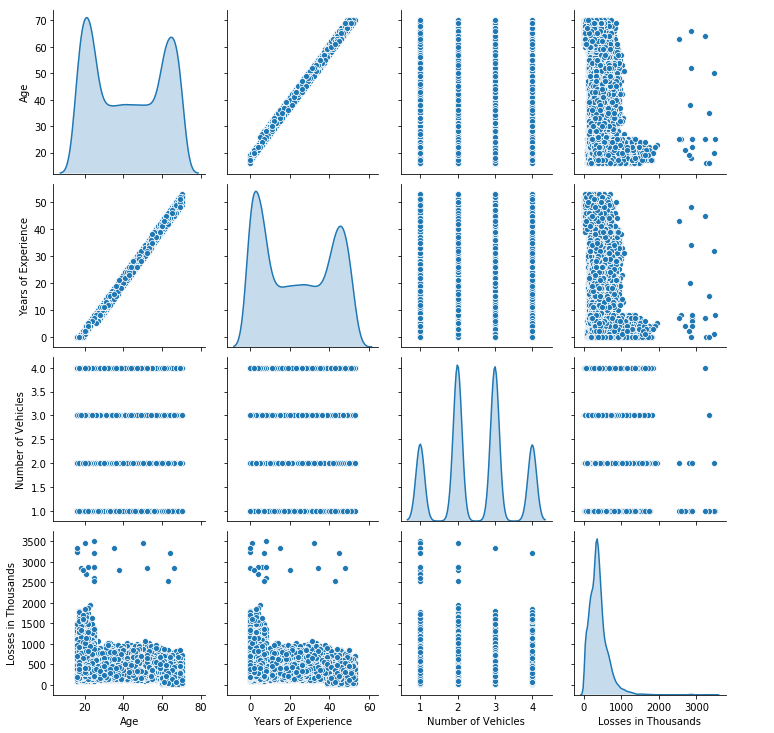

In [9]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [10]:
# A lot of people on younger and older side
# more number of people with high and low years of experience are present in the data

# Losses distrubution is skewed towards positive side

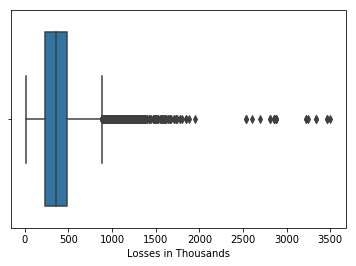

In [11]:
sns.boxplot(df['Losses in Thousands'])
plt.show()

# Outliers are present, few people have extreme losses
# Removing outliers here will create biasness

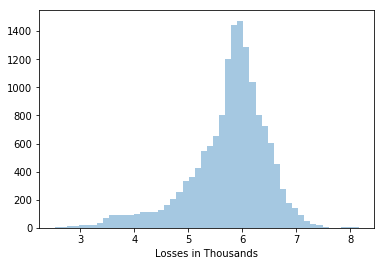

In [12]:
# this probably means we should take the log to normalize the data

sns.distplot(np.log(df['Losses in Thousands']),kde=False,bins=50)

# now the distribution looks normal

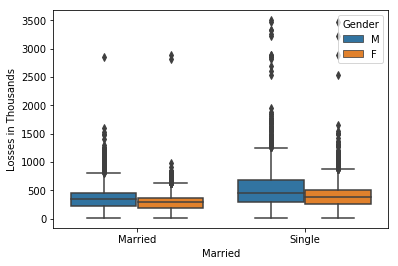

In [13]:
sns.boxplot(x="Married",y="Losses in Thousands",data=df,hue="Gender")

#this shows that single ppl & Male are the worst

In [14]:
df.corr()

# we see a high co-relation between Age and Years of Experience 

# which is obvious as with Age your Experience increases

,Age,Years of Experience,Number of Vehicles,Losses in Thousands
Age,1.000000,0.997161,0.008366,-0.442962
Years of Experience,0.997161,1.000000,0.008545,-0.442115
Number of Vehicles,0.008366,0.008545,1.000000,-0.011553
Losses in Thousands,-0.442962,-0.442115,-0.011553,1.000000


In [15]:
# first lets build a simple model with all variables and as is
# we will have to convert the string variables to dummy variables 
dummy_df=pd.get_dummies(df,drop_first=True)

**This will convert the object type or categorical type columns, into different columns**

**for example: 'Gender' has two categories 'M' and 'F', so the two columns 'Gender_F' and 'Gender_M' will be formed because of get dummies and Gender column will be dropped**

**Now because of `drop_first = True` one column of each category will be dropped, here 'Gender_F' is dropped**

dropping column is logical because if the gender is not male it will be female it is assumed, that extra column adds no value. Even if gender had three categories 'female', 'male' and 'other' then also dropping one made sense, because if its not in 'male' or 'other' then it has to be 'female'.

In [16]:
dummy_df.head()

,Age,Years of Experience,Number of Vehicles,Losses in Thousands,Gender_M,Married_Single
0,24,5,1,203.319595,1,0
1,31,10,1,402.197302,0,1
2,56,37,1,553.132096,1,0
3,52,31,1,292.430579,0,0
4,20,3,1,246.540576,1,1


In [17]:
#decide your regressor and predictor variables
x=dummy_df.drop("Losses in Thousands",axis=1)
y=dummy_df["Losses in Thousands"]
#split the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)

from sklearn.tree import DecisionTreeRegressor # import the functions
dtr=DecisionTreeRegressor() #call the function
dtr.fit(x_train,y_train)# fit the model


from sklearn.model_selection import cross_val_score
print(cross_val_score(dtr, x, y, cv=10))
#see the error parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#make prediction
pred=dtr.predict(x_test) #predicting values of y for all the xtest rows

print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print()
print("RMSE:",mean_squared_error(y_test,pred)**0.5)
print()
print("R2 Squarred:",r2_score(y_test, pred))

[ 0.10327505 -0.23861252  0.26455277  0.32442358  0.28554965  0.22241265
  0.33551861  0.26388662  0.22705661  0.17023182]
Mean Absolute Error: 154.37870001407424

RMSE: 225.88898019583684

R2 Squarred: 0.2133215048840722


In [18]:
x_test.head()

,Age,Years of Experience,Number of Vehicles,Gender_M,Married_Single
13812,18,1,4,0,0
7190,20,3,2,0,1
4582,37,19,2,0,0
9221,28,8,3,0,0
13129,25,7,4,0,1


In [19]:
import statsmodels.api as sm

X2 = sm.add_constant(x_train)
# sm.OLS by default does not add an intercept in the model.
#so we manually added it by the first line

dtr= sm.OLS(y_train,X2).fit()

print("Pvalues for each column:")
print()
print(dtr.pvalues)

Pvalues for each column:

const                   4.473194e-69
Age                     2.499574e-02
Years of Experience     6.100712e-02
Number of Vehicles      1.712818e-01
Gender_M               7.805621e-113
Married_Single         2.658858e-229
dtype: float64


/mnt/d/work/venv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
#to see the summary
print(dtr.summary())

                             OLS Regression Results                            
Dep. Variable:     Losses in Thousands   R-squared:                       0.299
Model:                             OLS   Adj. R-squared:                  0.299
Method:                  Least Squares   F-statistic:                     914.4
Date:                 Fri, 20 Mar 2020   Prob (F-statistic):               0.00
Time:                         19:38:40   Log-Likelihood:                -72519.
No. Observations:                10703   AIC:                         1.451e+05
Df Residuals:                    10697   BIC:                         1.451e+05
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 49

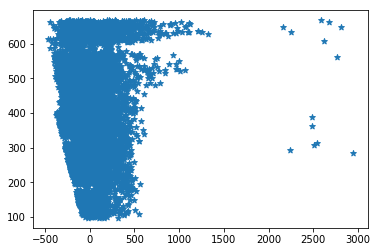

In [21]:
plt.scatter(dtr.resid, dtr.predict(),marker='*') # Plot between residual(actual - predicted) and predicted values
plt.show()

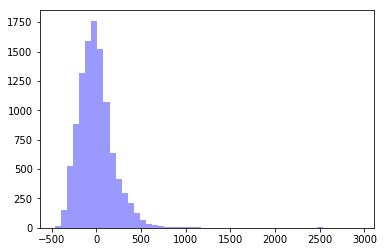

In [22]:
# error distribution
sns.distplot(dtr.resid, hist=True, kde=False, color = 'blue')
plt.show()

In [23]:
regression_model = DecisionTreeRegressor()
regression_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
# training Score
regression_model.score(x_train, y_train)

0.579703863054214

In [25]:
#testing score
regression_model.score(x_test, y_test)

0.21256763262477563

In [26]:
#RMSE
mean_squared_error(y_test,regression_model.predict(x_test))**0.5

225.99718873272155

#### Conclusion:

1. Here Training score is better than Testing score, therefore model is overfit


2. Score here measures R2_score, and 0.211 score says that only 21 % of variation were explained by the model, higher the r2 score better it is.


3. RMSE gives you on average how much the predicted value is deviating from observed value, 226K variation in losses is a lot.


4. Looking at RMSE and R2 score we can say that model is not good enough.

### Applying log to target variable for normal distribution

In [27]:
loss = dummy_df['Losses in Thousands']
# Storing the original value of losses

In [28]:
dummy_df['Losses in Thousands'] = np.log(dummy_df['Losses in Thousands'])
#applying log to change the distribution as normal

In [29]:
x=dummy_df.drop("Losses in Thousands",axis=1)
y=dummy_df["Losses in Thousands"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=7)
regression_model = DecisionTreeRegressor()
regression_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [30]:
# training Score
regression_model.score(x_train, y_train)

0.606091662197623

In [31]:
#testing score
regression_model.score(x_test, y_test)

0.23213772177791125

In [32]:
#RMSE
mean_squared_error(y_test,regression_model.predict(x_test))**0.5

0.6395336467365632

#### Conclusion:

1. Here Training score is better than Testing score, therefore model is not a good fit.


2. R2_score is 0.23, that only explains 23 % of total variation in the dataset. So overall its not satisfactory.


3. RMSE value doesnt make sense here log of losses is taken.


4. Looking at R2 score we can say that model is not good enough.